In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
import tensorflow as tf

In [77]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Flatten, LSTM, GlobalMaxPool1D, Conv1D, Input, RepeatVector, Reshape
from keras.backend import clear_session
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.merge import Concatenate
from keras.utils import plot_model

In [5]:
import string

In [6]:
import nltk
from nltk.corpus import stopwords

In [7]:
# I am using data from the Kaggle Twitter Disaster dataset to explore various neural network techniques
df = pd.read_csv(r'C:\Users\qays\Documents\Research\Python Projects\kaggle\nlp\Natural Language Processing with Disaster Tweets\train.csv')

In [8]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [10]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
df['keyword'].nunique()

221

In [12]:
df['location'].nunique()

3341

In [13]:
# Looking at the data we have a lot of different keywords and locations and free text in the text column
# I will replace the NULL values in the keyword and location column with None so that it is easier to manipulate
df.keyword = df.keyword.fillna('None')
df.location = df.location.fillna('None')

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
# Here we define a function to clean up all our text in each column.
# The steps we take are: turning all the text to lowercase, tokenizing the text by splitting it by spaces, removing all punctuation, taking away all words which contain characters not in the english alphabet, removing all stop words and finally removing all one letter words 
def clean_text(text):
    text = text.lower()
    tokens = text.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

In [16]:
df.text = df.text.apply(clean_text)
df.location = df.location.apply(clean_text)
df.keyword = df.keyword.apply(clean_text)

In [19]:
# Here we will define our train, test and target data
X = df
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify=y)

In [20]:
# First I will create a baseline Machine Learning model with count vectorizer and logistic regression
# To start with I will be using only the text column
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X_train.text)
X_train_CV = vectorizer.transform(X_train.text)
X_test_CV  = vectorizer.transform(X_test.text)
classifier_CVLR = LogisticRegression()
classifier_CVLR.fit(X_train_CV, y_train)
score_train_CVLR = classifier_CVLR.score(X_train_CV, y_train)
score_test_CVLR = classifier_CVLR.score(X_test_CV, y_test)
print("Accuracy:", score_train_CVLR)
print("Accuracy:", score_test_CVLR)

Accuracy: 0.964696223316913
Accuracy: 0.799080761654629


In [21]:
# Now I will try a Linear SVC model with CountVectorizer
model_CVLSVC = LinearSVC()
model_CVLSVC.fit(X_train_CV,y_train)
score_train_CVLSVC = model_CVLSVC.score(X_train_CV, y_train)
score_test_CVLSVC = model_CVLSVC.score(X_test_CV, y_test)
print("Accuracy:", score_train_CVLSVC)
print("Accuracy:", score_test_CVLSVC)

Accuracy: 0.9901477832512315
Accuracy: 0.7787261982928431


In [ ]:
# So far we can see that the logistic regression gives us a slightly better test accuracy than the Linear SVC model, but both are overfitted

In [22]:
# Now I will use TfidfVectorizer instead of CountVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train.text)
X_train_Tfidf = vectorizer.transform(X_train.text)
X_test_Tfidf  = vectorizer.transform(X_test.text)
classifier_TfidfLR = LogisticRegression()
classifier_TfidfLR.fit(X_train_Tfidf, y_train)
score_train_TfidfLR = classifier_TfidfLR.score(X_train_Tfidf, y_train)
score_test_TfidfLR = classifier_TfidfLR.score(X_test_Tfidf, y_test)
print("Accuracy:", score_train_TfidfLR)
print("Accuracy:", score_test_TfidfLR)

Accuracy: 0.8888341543513957
Accuracy: 0.8095863427445831


In [23]:
model_TfidfLSVC = LinearSVC()
model_TfidfLSVC.fit(X_train_Tfidf,y_train)
score_train_TfidfLSVC = model_TfidfLSVC.score(X_train_Tfidf, y_train)
score_test_TfidfLSVC = model_TfidfLSVC.score(X_test_Tfidf, y_test)
print("Accuracy:", score_train_TfidfLSVC)
print("Accuracy:", score_test_TfidfLSVC)

Accuracy: 0.9827586206896551
Accuracy: 0.7905449770190414


In [24]:
# We get slightly better results with the TfidfVectorizer

In [27]:
# Now I will try logistic regression and tfidf with 2-grams
vectorizerngram = TfidfVectorizer(ngram_range=(1,2))
vectorizerngram.fit(X_train.text)
X_train_ngram = vectorizerngram.transform(X_train.text)
X_test_ngram  = vectorizerngram.transform(X_test.text)
classifier_ngram = LogisticRegression()
classifier_ngram.fit(X_train_ngram, y_train)
score_train_ngram = classifier_ngram.score(X_train_ngram, y_train)
score_test_ngram = classifier_ngram.score(X_test_ngram, y_test)
print("Accuracy:", score_train_ngram)
print("Accuracy:", score_test_ngram)

Accuracy: 0.9101806239737275
Accuracy: 0.8082731451083388


In [ ]:
# So far our best model is the Logistic Regression model with TfidfVectorization taking each word separately
# Now we will create a baseline deep learning model

In [28]:
# First we will fit a tokenizer and turn our text into sequences of numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.text)
prep_data = tokenizer.texts_to_sequences(X_train.text)
df1 = X_train.copy()
df1['processed'] = prep_data

In [29]:
# We will use this function to get the length of our texts for each row
def length(x):
    a = len(x)
    return a

In [30]:
# We are padding our sequences to fit the maximum length of the text we have in our training set
df1['length'] = df1.processed.apply(length)
pad_sequence_length = np.max(df1['length'])
prep_data = pad_sequences(prep_data, maxlen=pad_sequence_length, padding='post')
input_dim = prep_data.shape[1]

In [31]:
# Here we are constructing our baseline model with a sequenctial set of 10 nodes to 1 nodes with dense connections
base_model = Sequential()
base_model.add(Dense(10, input_dim=input_dim, activation='relu'))
base_model.add(Dense(1, activation='sigmoid'))

In [32]:
# We are using binary_crossentropy because it is a binary classification model
base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Treating our test data in the exact same way as our test data
test_data = tokenizer.texts_to_sequences(X_test.text)
test_data = pad_sequences(test_data, maxlen=pad_sequence_length, padding='post')

In [35]:
clear_session()
base_history = base_model.fit(prep_data, y_train, epochs=20, verbose=0, validation_data = (test_data, y_test), batch_size=10)

In [36]:
# Creating a function to plot our training versus test accuracy
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.5596
Testing Accuracy:  0.5673


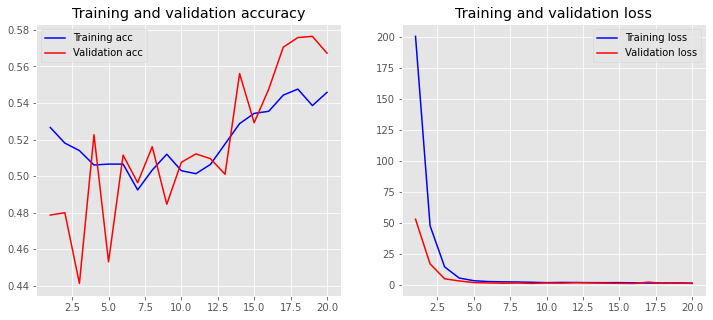

In [37]:
loss, accuracy = base_model.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = base_model.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(base_history)

In [ ]:
# With an initial 56.7% test accuracy we have a lot to do to improve our deep learning model

In [38]:
# Now I will try a deep learning model with a word embedding (GloVe) and LSTM cells
embeddings_index = dict()
f = open(r'C:\Users\qays\Documents\Research\word embeddings\glove.6B.100d.txt',  encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [42]:
vocab_size = len(tokenizer.word_index) + 1
print("Vocab size:",vocab_size)

Vocab size: 14593


In [43]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embedding_matrix.shape

(14593, 100)

In [44]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.7159597067086959

In [45]:
lstmmodel = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=pad_sequence_length, trainable=False)
lstmmodel.add(e)
lstmmodel.add(LSTM(100, return_sequences=True))
lstmmodel.add(GlobalMaxPool1D())
lstmmodel.add(Dense(1, activation='sigmoid'))
# compile the model
lstmmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(lstmmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 100)           1459300   
_________________________________________________________________
lstm (LSTM)                  (None, 23, 100)           80400     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,539,801
Trainable params: 80,501
Non-trainable params: 1,459,300
_________________________________________________________________
None


In [46]:
# fit the model
clear_session()
lstmhistory = lstmmodel.fit(prep_data, y_train, epochs=20, verbose=0, validation_data = (test_data, y_test), batch_size=10)

Training Accuracy: 0.9816
Testing Accuracy:  0.7820


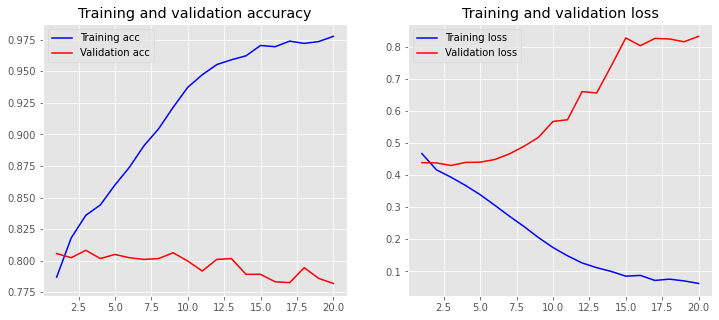

In [47]:
# We have increased the test accuracy by a lot with the word embedding and LSTM cells
loss, accuracy = lstmmodel.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = lstmmodel.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(lstmhistory)

In [52]:
# Comparing the LSTM model with training pretrained word embeddings with a globalmaxpool dense layer network and no LSTM cell
edmodel = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=pad_sequence_length, trainable=True)
edmodel.add(e)
edmodel.add(GlobalMaxPool1D())
edmodel.add(Dense(10, activation='relu'))
edmodel.add(Dense(1, activation='sigmoid'))

In [53]:
# compile the model
edmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(edmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 100)           1459300   
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,460,321
Trainable params: 1,460,321
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
# fit the model
clear_session()
edhistory = edmodel.fit(prep_data, y_train, epochs=20, verbose=0, validation_data = (test_data, y_test), batch_size=10)

Training Accuracy: 0.9882
Testing Accuracy:  0.7892


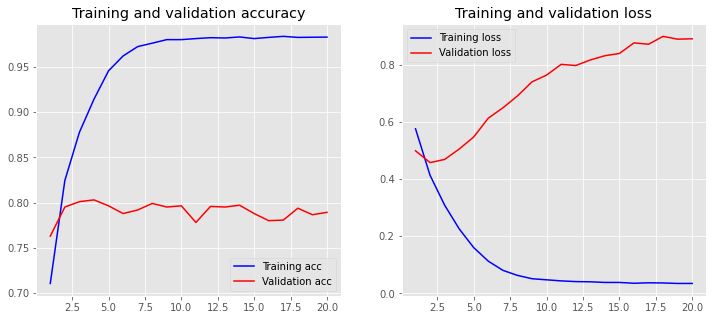

In [55]:
# The model with the dense layer worked slightly better than with just the LSTM cells
loss, accuracy = edmodel.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = edmodel.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(edhistory)

In [59]:
# Now we will add a covolutional layer
cnvmodel = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=pad_sequence_length, trainable=True)
cnvmodel.add(e)
cnvmodel.add(Conv1D(128, 5, activation='relu'))
cnvmodel.add(GlobalMaxPool1D())
cnvmodel.add(Dense(10, activation='relu'))
cnvmodel.add(Dense(1, activation='sigmoid'))
cnvmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cnvmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 23, 100)           1459300   
_________________________________________________________________
conv1d (Conv1D)              (None, 19, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,524,729
Trainable params: 1,524,729
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9878
Testing Accuracy:  0.7925


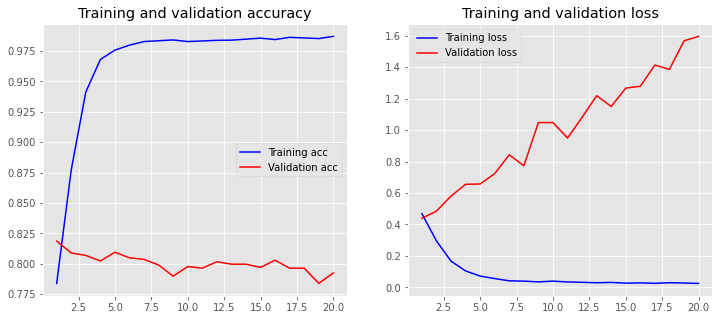

In [60]:
# This model has worked the best so far out of the neural networks
cnvhistory = cnvmodel.fit(prep_data, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(test_data, y_test),
                    batch_size=10)
loss, accuracy = cnvmodel.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnvmodel.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(cnvhistory)

In [61]:
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=pad_sequence_length, trainable=True)
model.add(e)
model.add(LSTM(100,return_sequences=True))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 23, 100)           1459300   
_________________________________________________________________
lstm (LSTM)                  (None, 23, 100)           80400     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19, 128)           64128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,605,129
Trainable params: 1,605,129
Non-trainable params: 0
____________________________________________

Training Accuracy: 0.9870
Testing Accuracy:  0.7557


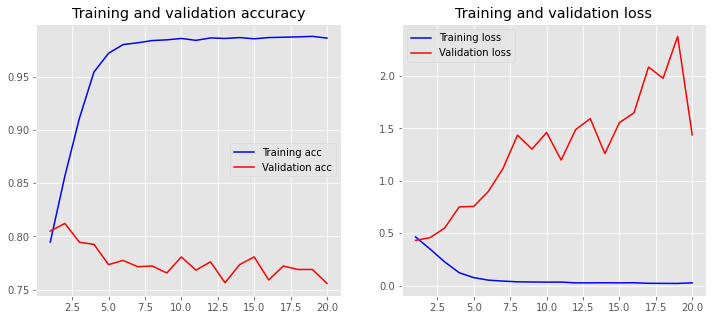

In [65]:
history = model.fit(prep_data, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(test_data, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Accuracy Count Vectorizer Logistic Regression: 0.799080761654629
Accuracy Count Vectorizer LinearSVC: 0.7787261982928431
Accuracy Tfidf Vectorizer Logistic Regression: 0.8095863427445831
Accuracy Tfidf Vectorizer LinearSVC: 0.7905449770190414
Accuracy Tfidf Vectorizer (1,2) ngrams Logistic Regression: 0.8082731451083388
Training Accuracy base model: 0.5596
Testing Accuracy base model:  0.5673
Training Accuracy lstm model: 0.7828
Testing Accuracy lstm model:  0.7538
Training Accuracy embeddings model: 0.9882
Testing Accuracy embeddings model:  0.7892
Training Accuracy convolutional: 0.9878
Testing Accuracy convolution:  0.7925
Training Accuracy convolutional and lstm: 0.9870
Testing Accuracy convolutional and lstm:  0.7557


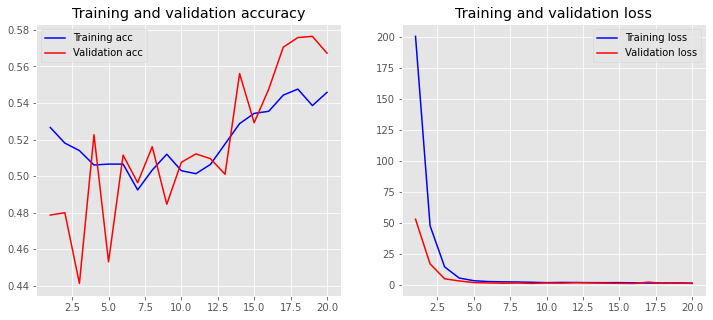

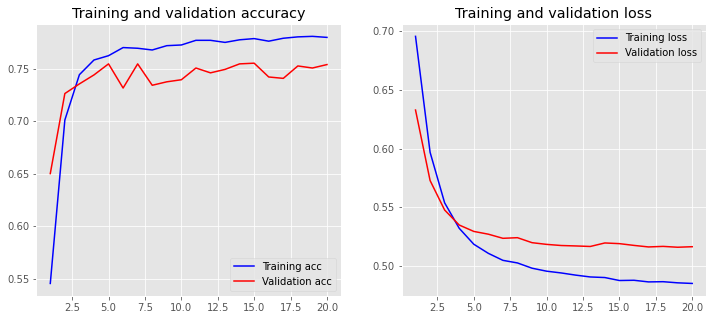

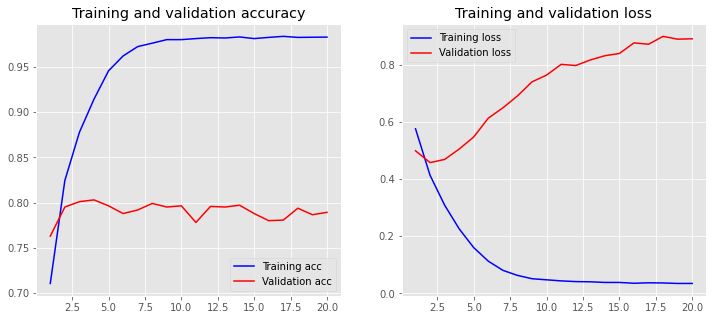

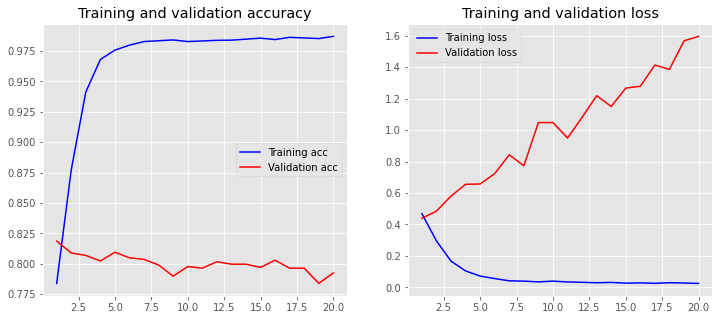

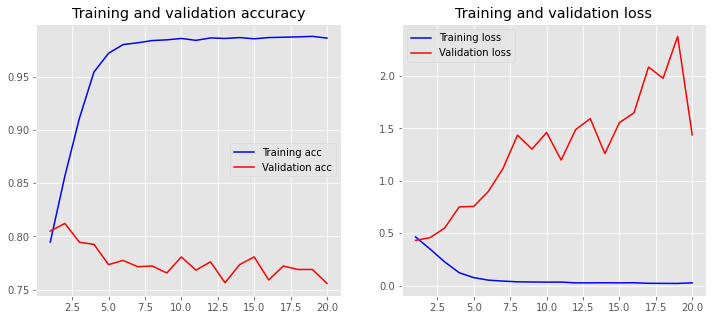

In [68]:
# Which model was the best?
# Our best deep learning model was the convolutional neural network and the best model overall was the tfidf logistic regression with 1-grams
print("Accuracy Count Vectorizer Logistic Regression:", score_test_CVLR)
print("Accuracy Count Vectorizer LinearSVC:", score_test_CVLSVC)
print("Accuracy Tfidf Vectorizer Logistic Regression:", score_test_TfidfLR)
print("Accuracy Tfidf Vectorizer LinearSVC:", score_test_TfidfLSVC)
print("Accuracy Tfidf Vectorizer (1,2) ngrams Logistic Regression:", score_test_ngram)
loss, accuracy = base_model.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy base model: {:.4f}".format(accuracy))
loss, accuracy = base_model.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy base model:  {:.4f}".format(accuracy))
plot_history(base_history)
loss, accuracy = lstmmodel.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy lstm model: {:.4f}".format(accuracy))
loss, accuracy = lstmmodel.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy lstm model:  {:.4f}".format(accuracy))
plot_history(lstmhistory)
loss, accuracy = edmodel.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy embeddings model: {:.4f}".format(accuracy))
loss, accuracy = edmodel.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy embeddings model:  {:.4f}".format(accuracy))
plot_history(edhistory)
loss, accuracy = cnvmodel.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy convolutional: {:.4f}".format(accuracy))
loss, accuracy = cnvmodel.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy convolution:  {:.4f}".format(accuracy))
plot_history(cnvhistory)
loss, accuracy = model.evaluate(prep_data, y_train, verbose=False)
print("Training Accuracy convolutional and lstm: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_data, y_test, verbose=False)
print("Testing Accuracy convolutional and lstm:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
# Now we will set up a randomized search to hyperparameter train our a model
# First we need to define our model as a function to run it multiple times
def create_model(num_filters, kernel_size):
    model = Sequential()
    e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=pad_sequence_length, trainable=True)
    model.add(e)
    model.add(LSTM(100,return_sequences=True))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(GlobalMaxPool1D())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7])
model = KerasClassifier(build_fn=create_model,
                            epochs=20, batch_size=10,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(prep_data, y_train)
grid.score(test_data, y_test)
print(grid_result.best_score_)
print(grid_result.best_params_)

In [69]:
# We will now also use the keyword and location data available. Thus we will have to build our model using the functional API instead of using sequential
# Creating a function to one hot encode the categorical data for the keyword data
def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

In [70]:
keyword_data_train = X_train[['keyword']]
keyword_data_test = X_test[['keyword']]
keyword_data_train, keyword_data_test = prepare_inputs(keyword_data_train, keyword_data_test)
input_dim_keyword = keyword_data_train.shape[1]

In [87]:
# Creating a tokenizer for the location data
ltokenizer = Tokenizer()
ltokenizer.fit_on_texts(X_train.location)
lprep_data = ltokenizer.texts_to_sequences(X_train.location)
lprep_data = pad_sequences(lprep_data, maxlen=pad_sequence_length, padding='post')
ltest_data = tokenizer.texts_to_sequences(X_test.location)
ltest_data = pad_sequences(ltest_data, maxlen=pad_sequence_length, padding='post')

In [93]:
# Using dense layers for the keyword data and LSTM and Convolutional layers for the location and text data
input_1 = Input(shape=(pad_sequence_length,))
input_2 = Input(shape=(input_dim_keyword,))
input_3 = Input(shape=(pad_sequence_length,))
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=pad_sequence_length, trainable=False)(input_1)
LSTM_layer = LSTM(128,return_sequences=True)(e)
Conv_layer = Conv1D(128, 5, activation='relu')(LSTM_layer)
dense_layer_1 = Dense(10, activation='relu')(input_2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
repeated_layer = RepeatVector(19)(dense_layer_2)
el = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=pad_sequence_length, trainable=False)(input_3)
LSTM_layerl = LSTM(128,return_sequences=True)(el)
Conv_layerl = Conv1D(128, 5, activation='relu')(LSTM_layerl)
concat_layer = Concatenate()([Conv_layer, repeated_layer, Conv_layerl])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(1, activation='sigmoid')(dense_layer_3)
model = Model(inputs=[input_1, input_2, input_3], outputs=output)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 23)]         0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           [(None, 187)]        0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 23)]         0                                            
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 23, 100)      1459300     input_24[0][0]                   
_______________________________________________________________________________________

In [ ]:
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [94]:
history = model.fit(x=[prep_data, keyword_data_train.toarray(), lprep_data], y=y_train, batch_size=128, epochs=10, verbose=False)

In [95]:
# By using all of the data available we are able to create a deep learning model with over 80% test accuracy
score = model.evaluate(x=[test_data, keyword_data_test.toarray(), ltest_data], y=y_test, verbose=False)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.48014482855796814
Test Accuracy: 0.8024328351020813
